**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/machine-learning-competitions).**

---


# Introduction

In this exercise, you will create and submit predictions for a Kaggle competition. You can then improve your model (e.g. by adding features) to apply what you've learned and move up the leaderboard.

Begin by running the code cell below to set up code checking and the filepaths for the dataset.

In [1]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex7 import *

#install seaborn
!pip install seaborn

# Set up filepaths
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 

Here's some of the code you've written so far. Start by running it again.

In [2]:
# Import helpful libraries
import matplotlib.pyplot as mp
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sb


In [3]:
# Load the data, and separate the target
iowa_file_path = '../input/train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice



In [4]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
feature_to_remove = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                     'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 
                     'MiscVal', 'MoSold','YrSold' ]
filtered_home_data = home_data.drop(labels=feature_to_remove, axis=1)
print(filtered_home_data.shape[1])
column_headers = list(filtered_home_data.columns.values)
print("The Column Header :", column_headers)

71
The Column Header : ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition', 'SalePrice']


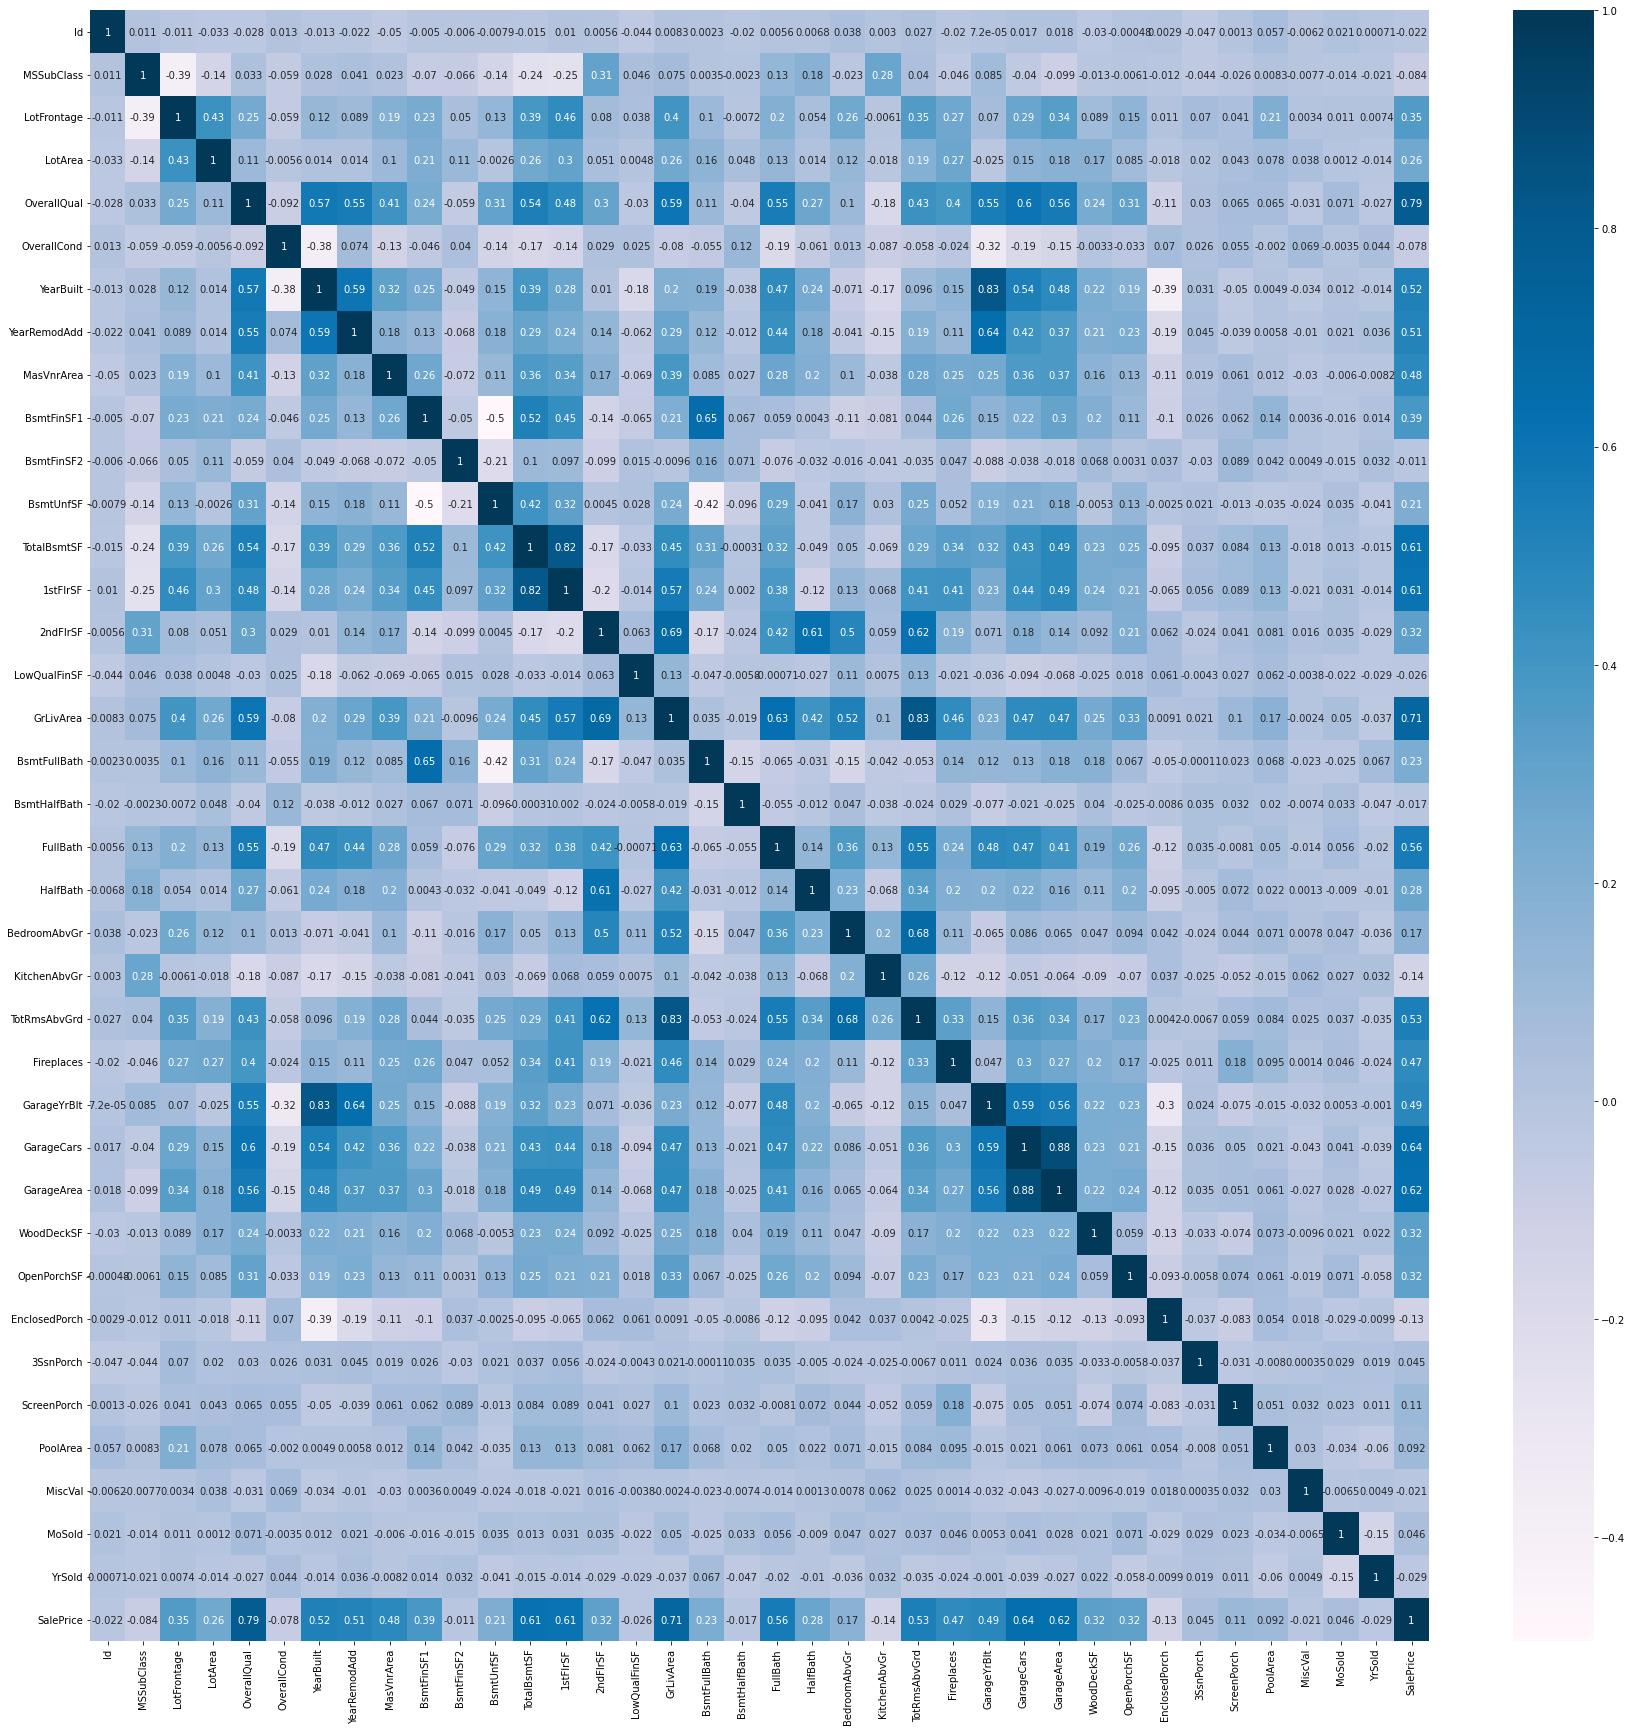

In [6]:
mp.figure(figsize=(30,30))
# plotting correlation heatmap
dataplot=sb.heatmap(home_data.corr(), annot=True, cmap=mp.cm.PuBu)
mp.show()
# displaying heatmap
mp.show()

In [7]:
# feature_to_remove = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch','OverallCond', 'BsmtFinSF2',
#                      'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 
#                      'MiscVal', 'MoSold','YrSold', 'MSSubClass' ]
# 0.79 - OverallQual, 0.71 - GrLivArea, 0.64, 0.62

# filtered_home_data = home_data.drop(labels=feature_to_remove, axis=1)
# print(filtered_home_data.shape[1])
# column_headers = list(filtered_home_data.columns.values)
# print("The Column Header :", column_headers)

In [8]:
# Create X (After completing the exercise, you can return to modify this line!)
# 0.79 - OverallQual, 
# 0.71 - GrLivArea, 
# 0.64: GarageCars,
# 0.62 : GarageArea
# 0.61: TotalBsmtSF
# 0.56: FullBath
# 0.53: TotRmsAbvGrd
# 0.52: YearBuilt
# 0.51: YearRemodAdd
# 0.49: GarageYrBlt
# 0.48: MasVnrArea

# features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 
#             'TotRmsAbvGrd'] -> o/p 21857
# features = ['OverallQual', 'GrLivArea', 'GarageCars',  'GarageArea',
#             'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'] #o/p -> 19,517
features = ['OverallQual', 'GrLivArea', 'GarageCars',  'GarageArea',
            'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
           'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea'] # o/p -> 19156

# Select columns corresponding to features, and preview the data
X = home_data[features]
X.head()

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)


In [9]:
# Remove Null value from validation data
# ['OverallQual', 'GrLivArea', 'GarageCars',  'GarageArea',
#             'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
#             'YearRemodAdd', 'GarageYrBlt -27']
# val_X['OverallQual'].isnull().sum()
val_XX = val_X.fillna(1978)
# val_X.describe()
val_XX['GarageYrBlt'].isnull().sum()

0

In [10]:
# Remove Null value from test data
# ['OverallQual', 'GrLivArea', 'GarageCars',  'GarageArea',
#             'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
#             'YearRemodAdd', 'GarageYrBlt -54']
# 1978
# train_X.describe()
train_XX = train_X.fillna(1978)

In [11]:
# Remove Null value from test data
XX = X.fillna(1978)
# val_X.describe()
XX['GarageYrBlt'].isnull().sum()

0

In [12]:
# Validation MAE for Random Forest Model: 19,231
# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_XX, train_y)
rf_val_predictions = rf_model.predict(val_XX)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 19,156


# Train a model for the competition

The code cell above trains a Random Forest model on **`train_X`** and **`train_y`**.  

Use the code cell below to build a Random Forest model and train it on all of **`X`** and **`y`**.

In [13]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(XX, y)

RandomForestRegressor(random_state=1)

Now, read the file of "test" data, and apply your model to make predictions.

In [14]:
# path to file you will use for predictions
test_data_path = '../input/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_X = test_data[features]





In [15]:
len(test_X)

1459

In [16]:
test_XX = test_X.fillna(1978)
# val_X.describe()
test_XX['GarageYrBlt'].isnull().sum()

0

In [17]:
# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_XX)

In [18]:
len(test_preds)

1459

Before submitting, run a check to make sure your `test_preds` have the right format.

In [19]:
# Check your answer (To get credit for completing the exercise, you must get a "Correct" result!)
step_1.check()
# step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

# Generate a submission

Run the code cell below to generate a CSV file with your predictions that you can use to submit to the competition.

In [20]:
# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

# Submit to the competition

To test your results, you'll need to join the competition (if you haven't already).  So open a new window by clicking on **[this link](https://www.kaggle.com/c/home-data-for-ml-course)**.  Then click on the **Join Competition** button.

![join competition image](https://i.imgur.com/axBzctl.png)

Next, follow the instructions below:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Output** tab on the right of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


# Continue Your Progress
There are many ways to improve your model, and **experimenting is a great way to learn at this point.**

The best way to improve your model is to add features.  To add more features to the data, revisit the first code cell, and change this line of code to include more column names:
```python
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
```

Some features will cause errors because of issues like missing values or non-numeric data types.  Here is a complete list of potential columns that you might like to use, and that won't throw errors:
- 'MSSubClass'
- 'LotArea'
- 'OverallQual' 
- 'OverallCond' 
- 'YearBuilt'
- 'YearRemodAdd' 
- '1stFlrSF'
- '2ndFlrSF' 
- 'LowQualFinSF' 
- 'GrLivArea'
- 'FullBath'
- 'HalfBath'
- 'BedroomAbvGr' 
- 'KitchenAbvGr' 
- 'TotRmsAbvGrd' 
- 'Fireplaces' 
- 'WoodDeckSF' 
- 'OpenPorchSF'
- 'EnclosedPorch' 
- '3SsnPorch' 
- 'ScreenPorch' 
- 'PoolArea' 
- 'MiscVal' 
- 'MoSold' 
- 'YrSold'

Look at the list of columns and think about what might affect home prices.  To learn more about each of these features, take a look at the data description on the **[competition page](https://www.kaggle.com/c/home-data-for-ml-course/data)**.

After updating the code cell above that defines the features, re-run all of the code cells to evaluate the model and generate a new submission file.  


# What's next?

As mentioned above, some of the features will throw an error if you try to use them to train your model.  The **[Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning)** course will teach you how to handle these types of features. You will also learn to use **xgboost**, a technique giving even better accuracy than Random Forest.

The **[Pandas](https://kaggle.com/Learn/Pandas)** course will give you the data manipulation skills to quickly go from conceptual idea to implementation in your data science projects. 

You are also ready for the **[Deep Learning](https://kaggle.com/Learn/intro-to-Deep-Learning)** course, where you will build models with better-than-human level performance at computer vision tasks.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-machine-learning/discussion) to chat with other learners.*